In [1]:
import matplotlib.pyplot as plt
import pickle
from scipy import optimize
import networkx as nx
import numpy as np
fontSize = 10
def func1(dims,a,b):  
  return a/dims + b 
#import seaborn as sns
from matplotlib.ticker import FormatStrFormatter 

### link prediction and curve fitting

I am  confused with the result that the saturate dim of walk length 10 and 30 are both 12.But the convergency point of nnl_10 and nnl_30 are 12 and 22.

88 88 88


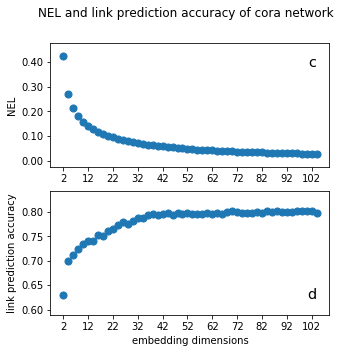

In [17]:
# optimal networks = ['cora','football']
graph = 'cora'
sub_dir = 'link_prediction'
f1 = open('./meta_data/{}/{}_dim.pkl'.format(sub_dir,graph),'rb')
dims = pickle.load(f1)
f1.close()
# f1 = open('./meta_data/{}/{}_walklength_30_nnl.pkl'.format(sub_dir,graph),'rb')
# nnl_30 = pickle.load(f1)
# f1.close()
f1 = open('./meta_data/{}/{}_walklength_10_nnl.pkl'.format(sub_dir,graph),'rb')
nnl_10 = pickle.load(f1)
f1.close()
# f1 = open('./meta_data/{}/{}_walklength_30_acc.pkl'.format(sub_dir,graph),'rb')
# acc_30 = pickle.load(f1)
# f1.close()
f1 = open('./meta_data/{}/{}_walklength_10_acc.pkl'.format(sub_dir,graph),'rb')
acc_10 = pickle.load(f1)
f1.close()
print (len(dims),len(nnl_10),len(acc_10))

def prediction_plot(dims,walkLengths,nnl_list,acc_list,graph):   
   fig, (ax1,ax2) = plt.subplots(2,1,figsize=(5,5)) 
   ax1.yaxis.set_major_formatter(FormatStrFormatter('%.2f')) 
   colors = ['b','y']
   for cnt,norms in enumerate(nnl_list):
       #accs = accs[:len(dims)]
       c, cov = optimize.curve_fit(func1, dims,norms)
       fit_values = (func1(np.array(dims),c[0],c[1]))
       bias = abs(np.array(norms)-np.array(fit_values))
       label = 'walk length: {} Func: y - {:.2f} = {:.2f}/x Error: {:.3f}'.format(walkLengths[cnt],c[1],c[0],np.mean(bias))  
       ax1.scatter(dims,norms,label='c',s=50) 
#        ax1.plot(dims,func1(np.array(dims),c[0],c[1]),label=label,c=colors[cnt]) 
       ax1.legend(loc='upper right',fontsize='x-large',frameon=False,markerscale=0)
       accs = acc_list[cnt]
       ax2.scatter(dims,accs,label='d',s=50)      
#        ax2.plot(dims,accs) 
       ax2.legend(loc='lower right',fontsize='x-large',frameon=False,markerscale=0)
    
   ax1.set_xticks(range(dims[0],dims[-1],10))
   ax2.set_xticks(range(dims[0],dims[-1],10))  
   ax1.set_ylabel('NEL',fontsize=fontSize)
   ax2.set_xlabel('embedding dimensions',fontsize=fontSize)  
   ax2.set_ylabel('link prediction accuracy')    
   fig.suptitle('NEL and link prediction accuracy of {} network'.format(graph))  
   plt.savefig('./meta_data/{}/{}_prediction.eps'.format(sub_dir,graph),format='eps',dpi=3000)
   plt.show()

#prediction_plot(dims,[10,30],[nnl_10,nnl_30],[acc_10,acc_30],graph)
# prediction_plot(dims,[30],[nnl_30],[acc_30],graph)
end = 52
dims = dims[:end]
nnl_10 = nnl_10[:end]
acc_10 = acc_10[:end]
prediction_plot(dims,[10],[nnl_10],[acc_10],graph)

### community detection and curve fitting

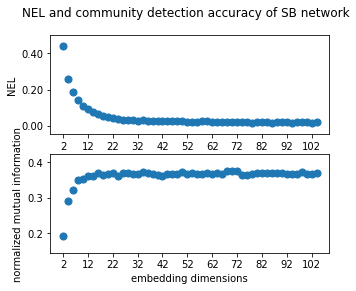

In [28]:
# optimal networks = ['SBM_256_blocks_16']
graph = 'SBM_256_blocks_16'
sub_dir = 'community_detection'
f2 = open('./meta_data/{}/{}_dim.pkl'.format(sub_dir,graph),'rb')
dims = pickle.load(f2)
f2.close()
f1 = open('./meta_data/{}/{}_nnl.pkl'.format(sub_dir,graph),'rb')
nnl = pickle.load(f1)
f1.close()
f1 = open('./meta_data/{}/{}_acc.pkl'.format(sub_dir,graph),'rb')
nmis = pickle.load(f1)
f1.close()

def clustering_plot(dims,nnl,nmis,graph):   
   fig, (ax1,ax2) = plt.subplots(2,1,figsize=(5,4)) 
   ax1.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
   c, cov = optimize.curve_fit(func1, dims,nnl)
   fit_values = (func1(np.array(dims),c[0],c[1]))
   bias = abs(np.array(nnl)-np.array(fit_values))
   label = 'Func: y - {:.2f} = {:.2f}/x Error: {:.3f}'.format(c[1],c[0],np.mean(bias))
   ax1.scatter(dims,nnl,s=50) 
#    ax1.plot(dims,func1(np.array(dims),c[0],c[1]),label=label,color='y') 
#    ax1.legend()
   ax2.scatter(dims,nmis,s=50) 
#    ax2.plot(dims,nmis) 
    
   ax1.set_xticks(range(dims[0],dims[-1],10))
   ax2.set_xticks(range(dims[0],dims[-1],10))  
   ax1.set_ylabel('NEL')
   ax2.set_xlabel('embedding dimensions',fontsize=fontSize)  
   ax2.set_ylabel('normalized mutual information')    
   fig.suptitle('NEL and community detection accuracy of SB network'.format(graph))     
   plt.savefig('./meta_data/{}/{}_clustering.eps'.format(sub_dir,graph),format='eps',dpi=3000)
   plt.show()
end = 52
dims = dims[:end]
nnl = nnl[:end]
nmis = nmis[:end]
clustering_plot(dims,nnl,nmis,graph)

### network size and density

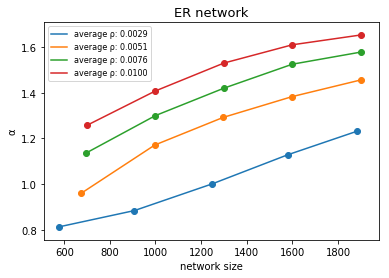

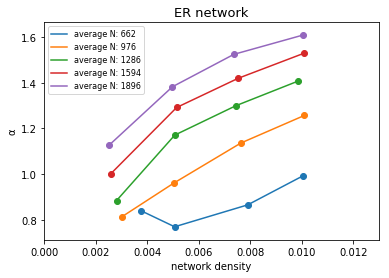

In [26]:
graph = 'ER'
sub_dir = 'size_density'

nodes_list =  range(400,2000,300)[1:]
nodes_density = [i*0.0005 for i in range(5,21,5)]

density_list = []; node_list = []
for density in nodes_density:
    for node in nodes_list:    
      G = nx. read_edgelist('./meta_data/{}/graph/{}_node_{}_density_{}'.format(sub_dir,graph,node,density))
      density_list.append(nx.density(G))
      node_list.append(len(G.nodes()))
density_matrix = np.array(density_list).reshape(len(nodes_density),-1)
node_matrix = np.array(node_list).reshape(len(nodes_density),-1)
b_matrixs =  np.load('./meta_data/{}/{}_para_0_matrixs.npy'.format(sub_dir,graph))

# plot network size's influence
# figsize=(6,4.5
fig, ax1 = plt.subplots()
for index,i in enumerate(nodes_density): 

    ax1.scatter(node_matrix[index,:],b_matrixs[0,index,:][1:])
    ax1.plot(node_matrix[index,:],b_matrixs[0,index,:][1:],label='average \u03C1: {:.4f}'.format(np.mean(density_matrix[index,:])))

    ax1.set_xlabel('network size',fontsize = fontSize)
    ax1.set_ylabel('\u03B1',fontsize = fontSize)
    ax1.legend(fontsize=8) 
#     ax1.legend(loc='lower right',fontsize='x-large',frameon=False,markerscale=0)

plt.title('{} network'.format(graph),fontsize =13) 
plt.savefig('./meta_data/{}/{}_nodeNumber.eps'.format(sub_dir,graph),format='eps',dpi=3000)  
plt.show()

# plot network density's influence
# figsize=(6,4.5)
fig, ax2 = plt.subplots()
for index,i in enumerate(nodes_list):
    ax2.scatter(density_matrix[:,index],b_matrixs[0,:,index])
    ax2.plot(density_matrix[:,index],b_matrixs[0,:,index],label='average N: {:d}'.format(int(np.mean(node_matrix[:,index]))))
  
    ax2.set_xlabel('network density',fontsize = fontSize)
    ax2.set_ylabel('\u03B1',fontsize = fontSize)
    ax2.legend(fontsize=8)
#     ax2.legend(loc='lower right',fontsize='x-large',frameon=False,markerscale=0)

plt.xlim(0.000,0.013)
plt.title('{} network'.format(graph),fontsize =13) 
plt.savefig('./meta_data/{}/{}_density.eps'.format(sub_dir,graph),format='eps',dpi=3000)  
plt.show()

### variance

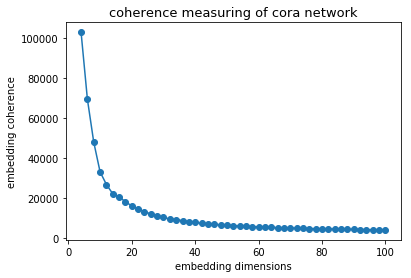

In [17]:
# optimal networks = ['cora','football']
graph = 'cora'
sub_dir = 'variance'
# f1 = open('./meta_data/{}/{}_dim_base2.pkl'.format(sub_dir,graph),'rb')
f1 = open('./meta_data/{}/{}_dim.pkl'.format(sub_dir,graph),'rb')
dims = pickle.load(f1)
f1.close()
# f1 = open('./meta_data/{}/{}_variance_base2.pkl'.format(sub_dir,graph),'rb')
f1 = open('./meta_data/{}/{}_variance.pkl'.format(sub_dir,graph),'rb')
variance = pickle.load(f1)
f1.close()

def variance_plot(dims,variance,graph):   
   fig, ax1 = plt.subplots() 
   ax1.scatter(dims,variance) 
   ax1.plot(dims,variance) 
   #ax1.legend()     
#    ax1.set_xscale('log', basex=2)         
      
   ax1.set_ylabel('embedding coherence',fontsize = fontSize)
   ax1.set_xlabel('embedding dimensions',fontsize = fontSize)      
   plt.title('coherence measuring of {} network'.format(graph),fontsize = 13)  
   plt.savefig('./meta_data/{}/{}_variance .eps'.format(sub_dir,graph),format='eps',dpi=5000)  
   plt.show()
# dims = [dims[i]  for i in range(len(dims)) if divmod(i,2)[1] == 0]
# variance = [variance[i]  for i in range(len(variance)) if divmod(i,2)[1] == 0]
#dims = dims[indexs]
#variance = variance[indexs]
dims = dims[1:]
variance = variance[1:]
variance_plot(dims,variance,graph)

### variance_base2

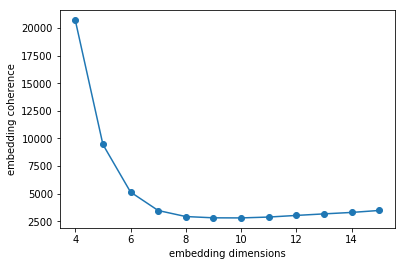

In [18]:
# optimal networks = ['cora','football']

sub_dir = 'variance'
dims = range(4,16,1)
f1 = open('./meta_data/{}/{}_variance_base2.pkl'.format(sub_dir,graph),'rb')
variance = pickle.load(f1)
f1.close()

def variance_plot(dims,variance,graph):   
   fig, ax1 = plt.subplots() 
   ax1.scatter(dims,variance) 
   ax1.plot(dims,variance) 
   #ax1.legend()     
#    ax1.set_xscale('log', basex=2)         
      
   ax1.set_ylabel('embedding coherence',fontsize = fontSize)
   ax1.set_xlabel('embedding dimensions',fontsize = fontSize)      
#    plt.title('{} variance'.format(graph),fontsize = 13)  
   plt.savefig('./meta_data/{}/{}_variance_base2 .eps'.format(sub_dir,graph),format='eps',dpi=5000)  
   plt.show()
# dims = [dims[i]  for i in range(len(dims)) if divmod(i,2)[1] == 0]
# variance = [variance[i]  for i in range(len(variance)) if divmod(i,2)[1] == 0]
#dims = dims[indexs]
#variance = variance[indexs]
# dims = dims[1:]
# variance = variance[1:]
variance_plot(dims,variance,graph)

### LINE and node2vec

148 148 148


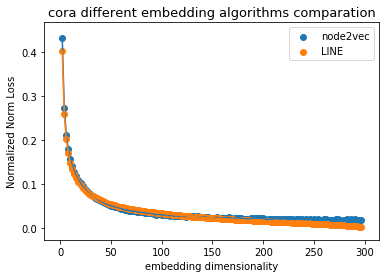

In [8]:
# optimal networks = ['citeseer','football']
graph = 'cora'
sub_dir = 'line'
f1 = open('./meta_data/{}/{}_dim_compare'.format(sub_dir,graph),'rb')
dims = pickle.load(f1)
f1.close()
f1 = open('./meta_data/{}/{}_line_compare'.format(sub_dir,graph),'rb')
line_norms = pickle.load(f1)
f1.close()
f1 = open('./meta_data/{}/{}_node2vec_compare'.format(sub_dir,graph),'rb')
node2vec_norms = pickle.load(f1)
f1.close()
print (len(line_norms),len(node2vec_norms),len(dims))
# dims = dims[:-1]

def compare_method_plot(dims,node2vec_norm,line_norm,node):   
   fig, ax = plt.subplots() 
   ax.scatter(dims,node2vec_norms,label='node2vec') 
   ax.plot(dims,node2vec_norms) 
   ax.scatter(dims,line_norms,label='LINE')
   ax.plot(dims,line_norms)
   ax.legend()           
   ax.set_ylabel('Normalized Norm Loss',fontsize = 10)
   ax.set_xlabel('embedding dimensionality',fontsize = 10)             
   plt.title('{} different embedding algorithms comparation'.format(node),fontsize = 13)   
   plt.savefig('./meta_data/{}/compare different embedding methods:{}.eps'.format(sub_dir,node),format='eps',dpi=4000)
   plt.show()

compare_method_plot(dims,node2vec_norms,line_norms,graph)    

### PPI loss